Дз №2

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Генераторы(решил реализовать через классы в отличие от практики):

In [2]:
class LinearCongruentialGenerator:
    def __init__(self, seed):
        self.modulus = 2**32  # Модуль
        self.a = 1664525      # Множитель
        self.c = 1013904223   # Инкремент
        self.seed = seed      # Начальное значение (seed)

    def next(self):
        self.seed = (self.a * self.seed + self.c) % self.modulus
        return self.seed / self.modulus  # Нормализуем результат для получения значений от 0 до 1

class NormalDistributionGenerator:
    def __init__(self, mean=0, stddev=1):
        self.mean = mean
        self.stddev = stddev

    def next(self, size=1):
        return np.random.normal(loc=self.mean, scale=self.stddev, size=size)
class CauchyDistributionGenerator:
    def __init__(self, x0=0, gamma=1):
        self.x0 = x0
        self.gamma = gamma

    def next(self, size=1):
        return np.random.standard_cauchy(size=size)

In [3]:
# Параметры
n_values = [10, 100, 1000, 10000, 100000, 1000000,1000000]
num_samples = 10000
seed = 42
lcg = LinearCongruentialGenerator(seed)
normal_gen = NormalDistributionGenerator()
cauchy_gen = CauchyDistributionGenerator()

In [4]:
def jackknife(data):
    n = len(data)
    theta_hat = np.mean(data)  # Оценка матожидания
    jackknife_estimates = np.array([(n * theta_hat - x) / (n - 1) for x in data])
    return jackknife_estimates

def generate_jackknife(gen, n=10000):
    data = []
    for _ in range(n):
        data.append(gen.next())

    jackknife_estimates = jackknife(data)

    # Оценка стандартной ошибки
    se = np.std(jackknife_estimates, ddof=1)

    # Доверительный интервал на уровне 95%
    alpha = 0.05
    z_score = stats.norm.ppf(1 - alpha / 2)

    mean_estimate = np.mean(data)
    confidence_interval = (mean_estimate - z_score * se, mean_estimate + z_score * se)
    return confidence_interval[0], confidence_interval[1] , mean_estimate

In [5]:
confidence_interval_l = []
confidence_interval_r=[]
mean_estimate=[]

for n in n_values:
    confidence_interval_l_ ,confidence_interval_r_ ,mean_estimate_ = generate_jackknife(cauchy_gen, n)
    confidence_interval_l.append(confidence_interval_l_)
    confidence_interval_r.append(confidence_interval_r_)
    mean_estimate.append(mean_estimate_)

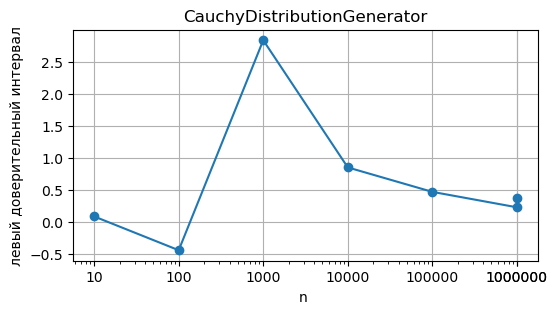

In [6]:
plt.figure(figsize=(6, 3))
plt.plot(n_values, confidence_interval_l, marker='o')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.xlabel('n ')
plt.ylabel('левый доверительный интервал')
plt.title('CauchyDistributionGenerator')
plt.grid(True)
plt.xticks(n_values, labels=n_values)  # Установка меток на оси x
plt.show()

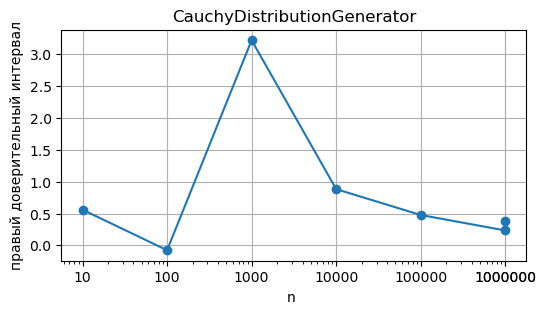

In [7]:
plt.figure(figsize=(6, 3))
plt.plot(n_values, confidence_interval_r, marker='o')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.xlabel('n ')
plt.ylabel('правый доверительный интервал')
plt.title('CauchyDistributionGenerator')
plt.grid(True)
plt.xticks(n_values, labels=n_values)  # Установка меток на оси x
plt.show()

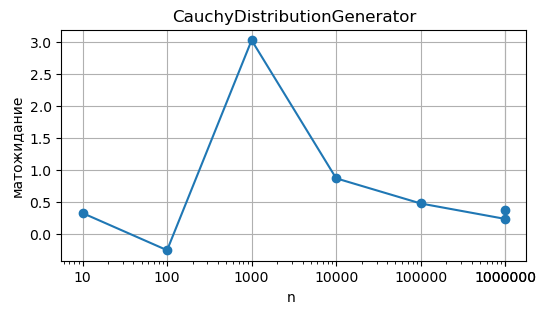

In [8]:
plt.figure(figsize=(6, 3))
plt.plot(n_values, mean_estimate, marker='o')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.xlabel('n ')
plt.ylabel('матожидание')
plt.title('CauchyDistributionGenerator')
plt.grid(True)
plt.xticks(n_values, labels=n_values)  # Установка меток на оси x
plt.show()

In [9]:
def bootstrap(data, num_samples):
    n = len(data)
    boot_means = np.empty(num_samples)
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)  # Случайная выборка с возвращением
        boot_means[i] = np.mean(sample)  # Сохраняем среднее
    
    return boot_means

def generate_bootstrap(gen, n, num_bootstrap_samples=1000):
    data = []
    
    # Генерация данных с использованием метода генератора
    for _ in range(n):
        # Предполагается, что .next() возвращает массив, берем первый элемент, если это массив
        data.append(gen.next(1)[0])
    
    # Преобразуем список в numpy массив для удобства
    data = np.array(data)
    
    # Бутстреп оценка среднего
    boot_means = bootstrap(data, num_bootstrap_samples)
    
    # Вычисление доверительных интервалов на основе бутстреп-оценки
    lower_bound = np.percentile(boot_means, 0.5)  
    upper_bound = np.percentile(boot_means, 95.0)
    mean_estimate = np.mean(data)
    
    return lower_bound, upper_bound, mean_estimate

In [10]:
n_values = [10, 100, 1000, 10000, 100000, 1000000,1000000]
num_samples = 10000
num_bootstrap_samples = 10000
confidence_interval_l = []
confidence_interval_r=[]
mean_estimate=[]

for n in n_values:
    confidence_interval_l_ ,confidence_interval_r_ ,mean_estimate_ = generate_bootstrap(cauchy_gen, n)
    confidence_interval_l.append(confidence_interval_l_)
    confidence_interval_r.append(confidence_interval_r_)
    mean_estimate.append(mean_estimate_)

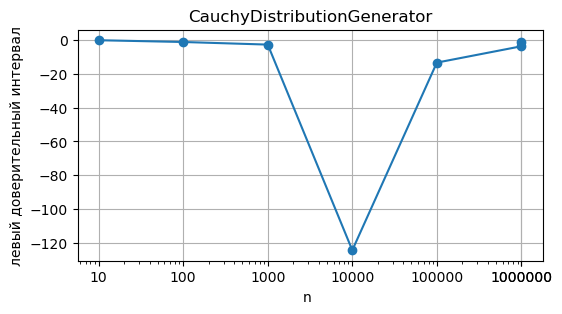

In [11]:
plt.figure(figsize=(6, 3))
plt.plot(n_values, confidence_interval_l, marker='o')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.xlabel('n ')
plt.ylabel('левый доверительный интервал')
plt.title('CauchyDistributionGenerator')
plt.grid(True)
plt.xticks(n_values, labels=n_values)  # Установка меток на оси x
plt.show()

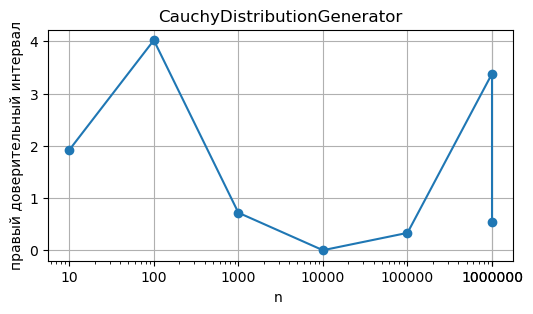

In [12]:
plt.figure(figsize=(6, 3))
plt.plot(n_values, confidence_interval_r, marker='o')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.xlabel('n ')
plt.ylabel('правый доверительный интервал')
plt.title('CauchyDistributionGenerator')
plt.grid(True)
plt.xticks(n_values, labels=n_values)  # Установка меток на оси x
plt.show()

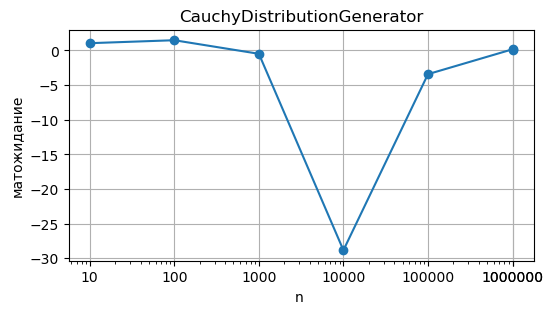

In [13]:
plt.figure(figsize=(6, 3))
plt.plot(n_values, mean_estimate, marker='o')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.xlabel('n ')
plt.ylabel('матожидание')
plt.title('CauchyDistributionGenerator')
plt.grid(True)
plt.xticks(n_values, labels=n_values)  # Установка меток на оси x
plt.show()